# Applied Statistics

# Part A

# Question 1

1.A. Refer above table and find the joint probability of the people who planned to purchase and actually placed an order. 
1.B. Refer to the above table and find the joint probability of the people who planned to purchase and actually placed an order, given that
people planned to purchase.

You observe from the above table, that 400 people planned to purchase and actually placed an order for Product A is 
400 out of 2000 people.

In [536]:
# PP is the number of people who planned and actually placed an order for Product A
PP = 400
TP  = 2000
P = round(FE6 / TE,4) 
print('1.A) Joint probability of the people who planned to purchase and actually placed an order is %1.4f' % P)

1.A) Joint probability of the people who planned to purchase and actually placed an order is 0.2000


In [537]:
# P1 = P(Actually placed an order | Planned to purchase)
# P2 = Planned to purchase and actually placed an order
# P3 = Planned to purchase
P1   = (400 / 2000 )/ (500 / 2000)

print('1.B) P(Actually placed an order | Planned to purchase) is %1.4f' % P1) 

1.B) P(Actually placed an order | Planned to purchase) is 0.8000


# Question 2

An electrical manufacturing company conducts quality checks at specified periods on the products it manufactures. Historically, the
failure rate for the manufactured item is 5%. Suppose a random sample of 10 manufactured items is selected. Answer the following
questions. 
2.A. Probability that none of the items are defective? 
2.B. Probability that exactly one of the items is defective?
2.C. Probability that two or fewer of the items are defective? 
2.D. Probability that three or more of the items are defective ? 

In [6]:
import numpy             as np
import pandas            as pd
import scipy.stats       as stats
import matplotlib.pyplot as plt

In [541]:
p   =  0.05 # failure rate for manufactured item is 5%
n   =  10 # sample size
k   =  np.arange(0,11) # An array of quantiles

In [542]:
binomial = stats.binom.pmf(k,n,p)

In [543]:
binomial

array([5.98736939e-01, 3.15124705e-01, 7.46347985e-02, 1.04750594e-02,
       9.64808106e-04, 6.09352488e-05, 2.67259863e-06, 8.03789063e-08,
       1.58642578e-09, 1.85546875e-11, 9.76562500e-14])

In [544]:
print('2.a) Probability that none of the items are defective is %1.4f' %binomial[0])

2.a) Probability that none of the items are defective is 0.5987


In [545]:
print('2.b) Probability that exactly one of the items is defective? is %1.4f' %binomial[1])

2.b) Probability that exactly one of the items is defective? is 0.3151


Calculating the cumulative probability of Upto Two items being defective

In [12]:
cum_binomial = stats.binom.cdf(k,n,p)

In [13]:
cum_binomial

array([0.59873694, 0.91386164, 0.98849644, 0.9989715 , 0.99993631,
       0.99999725, 0.99999992, 1.        , 1.        , 1.        ,
       1.        ])

In [15]:
print('2.c) Two or fewer of the items are defective is %1.4f' %cum_binomial[2])

2.c) Two or fewer of the items are defective is 0.9885


To find the probability that three or more of the items are defective we need to subtract cumulative Probability upto 2 
defective items from 1.

In [17]:
P = 1- cum_binomial[2]
print('2.d) Probability that three or more of the items are defective is %1.4f' % P)

2.d) Probability that three or more of the items are defective is 0.0115


# Plot the binomial distribution function

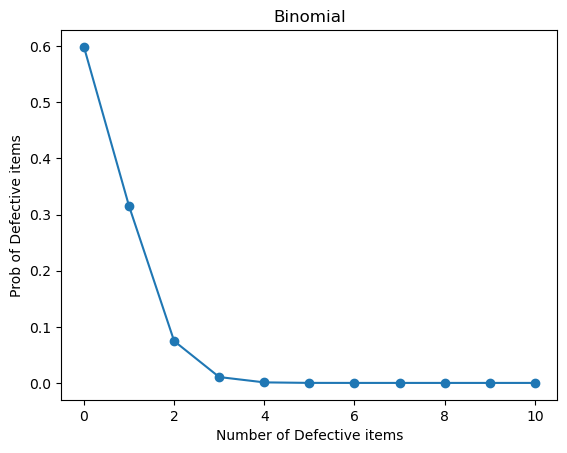

In [21]:
plt.plot(k,binomial, 'o-')
plt.title('Binomial')
plt.xlabel('Number of Defective items')
plt.ylabel('Prob of Defective items')
plt.show()

# Question 3

A car salesman sells on an average 3 cars per week. 
3.A. What is Probability that in a given week he will sell some cars? 
3.B. What is Probability that in a given week he will sell 2 or more but less than 5 cars? 
3.C. Plot the poisson distribution function for cumulative probability of cars sold per-week vs number of cars sold per week. 

Given, average cars sold per week, $\lambda$ = 3

In [546]:
rate =  3 #mean
n    =  np.arange(0,16)
cum_poisson = stats.poisson.cdf(n,rate)

In [30]:
cum_poisson

array([0.04978707, 0.19914827, 0.42319008, 0.64723189, 0.81526324,
       0.91608206, 0.96649146, 0.9880955 , 0.99619701, 0.99889751,
       0.99970766, 0.99992861, 0.99998385, 0.9999966 , 0.99999933,
       0.99999988])

In [31]:
# P = probability that in a given week the car salesman sells some cars
P   = 1 - cum_poisson[0]
print('3.a) Probability that in a given week he will sell some cars  is %1.4f' % P)

3.a) Probability that in a given week he will sell some cars  is 0.9502


In [32]:
# Let P1 be the probability that the salesman sells more than 4 cars
P1 = cum_poisson[4] # P(X >=4)
# Let P2 be the probability that the salesman sells more than 1 car
P2 = cum_poisson[1] # P(X >=1)
P = P1 - P2 # Prob. that the salesman will sell between 2 and 5 cars
print('3.b) Probability that the salesman sells between 2 and 5 cars is %1.4f' % P)

3.b) Probability that the salesman sells between 2 and 5 cars is 0.6161


# Plotting a Poisson Distribution Function

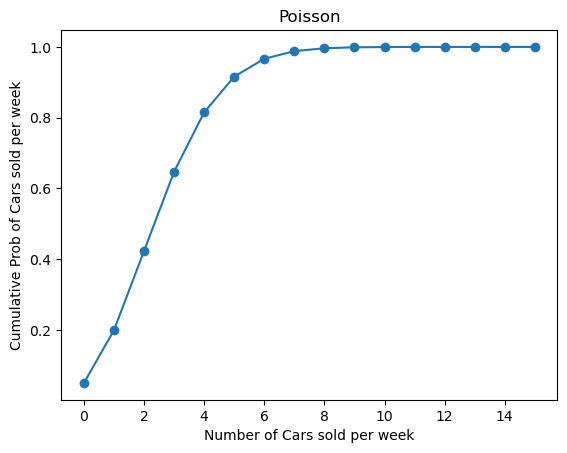

In [34]:
poisson = stats.poisson.cdf(n,rate)
plt.plot(n,poisson, 'o-')
plt.title('Poisson')
plt.xlabel('Number of Cars sold per week')
plt.ylabel('Cumulative Prob of Cars sold per week')
plt.show()

# Question 4

Accuracy in understanding orders for a speech based bot at a restaurant is important for the Company X which has designed,
marketed and launched the product for a contactless delivery due to the COVID-19 pandemic. Recognition accuracy that measures the
percentage of orders that are taken correctly is 86.8%. Suppose that you place an order with the bot and two friends of yours
independently place orders with the same bot. Answer the following questions. 
4.A. What is the probability that all three orders will be recognised correctly? 
4.B. What is the probability that none of the three orders will be recognised correctly? 
4.C. What is the probability that at least two of the three orders will be recognised correctly? 

Given, The probability of a correct order is 0.868. Using binomial distribution,

In [64]:
import scipy.stats as stats
import matplotlib.pyplot as plt

k = np.arange(0,4)
n = 3
p = 0.868
new_binomial = stats.binom.pmf(k,n,p)

In [65]:
new_binomial

array([0.00229997, 0.0453721 , 0.2983559 , 0.65397203])

In [67]:
print('4.A) Probability that all three orders will be recognised correctly is %1.4f' %new_binomial[3])

4.A) Probability that all three orders will be recognised correctly is 0.6540


Likewise, calculate X= 0, 

In [68]:
print('4.B) Probability that all three orders will be recognised correctly is %1.4f' %new_binomial[0])

4.B) Probability that all three orders will be recognised correctly is 0.0023


In [ ]:
Now, Calculating P(X>=2) = P(X=2)+P(X=3)

In [71]:
cumbino = new_binomial[2] + new_binomial[3]

In [73]:
print('4.C) Probability that at least two of the three orders will be recognised correctly %1.4f' %cumbino)

4.C) Probability that at least two of the three orders will be recognised correctly 0.9523


# Question 5

Explain 1 real life industry scenario (other than the ones mentioned above) where you can use the concepts learnt in this module of
Applied Statistics to get data driven business solution.

Consider organizing the staff members for different weekdays for a hospital's emergency ward. Total number of patients admitted in emergency due to a specific disease in a given time period. You can analyse the distribution of patient numbers for each day of the week. Most likely, count will be more during weekends where you need larger staff capacity. Thus statistics can be used to calculate the change in demand and prepare the next actions accordingly.

# Part B

In [621]:
df = pd.read_csv('DS+-+Part2+-+Basketball (1).csv')
df.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [147]:
df.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15
60,Team 61,1,-,-,-,-,-,-,-,-,-,2017~18,9


In [148]:
df.shape

(61, 13)

In [149]:
df.describe(include = "all")

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
count,61,61.000000,61,61,61,61,61,61,61,61,61,61,61.000000
unique,61,NaN,61,53,59,57,56,60,61,8,10,47,NaN
top,Team 1,NaN,4385,2762,7,14,37,70,3140,-,-,1929,NaN
freq,1,NaN,1,3,2,2,3,2,1,52,48,10,NaN
mean,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.081967
std,NaN,26.827225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.276663
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
50%,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000
75%,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000


We observe that there are only 2 numeric columns i.e Tournament and Highest Position Held.
Most of the columns are of categorical type.

# Checking for null Values in the dataset

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


This again proves that there are only 2 numeric columns, others are of object type 
Columns should be converted to numeric wherever necessary to perform further analysis. 

In [151]:
df.isnull().sum()

Team                   0
Tournament             0
Score                  0
PlayedGames            0
WonGames               0
DrawnGames             0
LostGames              0
BasketScored           0
BasketGiven            0
TournamentChampion     0
Runner-up              0
TeamLaunch             0
HighestPositionHeld    0
dtype: int64

# Converting categorical columns into numeric type to perform EDA

In [152]:
df.columns

Index(['Team', 'Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion',
       'Runner-up', 'TeamLaunch', 'HighestPositionHeld'],
      dtype='object')

In [153]:
df_copy=df.copy(deep=True);

In [154]:
df_copy

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15


1. We see that the column Runner-Up should be renamed as "Runnerup" to avoid confusions while doing the analysis.
2. Team Launch column indicates a year field which is given as an interval field which can be converted as first 4 letters to simplify the data. 
3. As most of the data is categorical, we are converting it to numeric datatype. 

In [155]:
df_copy.rename(columns = {'Runner-up': 'Runnerup'}, inplace = True)

In [159]:
df_copy.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld
56,Team 57,1,34,38,8,10,20,38,66,-,-,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,-,-,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,-,-,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,-,-,1955-56,15
60,Team 61,1,-,-,-,-,-,-,-,-,-,2017~18,9


We observe that there are missing values in few columns of the dataset.

# Replacing NaN values with 0 

In [160]:
df_copy.replace(np.nan, 0, inplace=True)

In [161]:
df_copy=df_copy.replace('-',0);

In [162]:
df_copy.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld
56,Team 57,1,34,38,8,10,20,38,66,0,0,2009-10,20
57,Team 58,1,22,30,7,8,15,37,57,0,0,1956-57,16
58,Team 59,1,19,30,7,5,18,51,85,0,0,1951~52,16
59,Team 60,1,14,30,5,4,21,34,65,0,0,1955-56,15
60,Team 61,1,0,0,0,0,0,0,0,0,0,2017~18,9


We can observe that the last row had invalid data which has been replaced with Zeroes.

# Computing the descriptive summary of the transformed data

In [163]:
df_copy.describe(include = "all")

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld
count,61,61.000000,61,61,61,61,61,61,61,61.0,61.0,61,61.000000
unique,61,NaN,61,53,59,57,56,60,61,8.0,10.0,47,NaN
top,Team 1,NaN,4385,2762,7,14,37,70,3140,0.0,0.0,1929,NaN
freq,1,NaN,1,3,2,2,3,2,1,52.0,48.0,10,NaN
mean,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.081967
std,NaN,26.827225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.276663
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
50%,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000
75%,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000


1. We see that all the values are converted into Numeric datatype describing the measures of central tendency.
2. We can also observe that there are NaN values in the Team Launch column

In [165]:
pd.DataFrame(df_copy['TeamLaunch'])

,TeamLaunch
0,1929
1,1929
2,1929
3,1931to32
4,1929
...,...
56,2009-10
57,1956-57
58,1951~52
59,1955-56


We shall keep the first value as the team launch year.

In [166]:
df_copy['TeamLaunch']=df_copy['TeamLaunch'].str.slice(0,4);

In [167]:
df_copy['TeamLaunch']

0     1929
1     1929
2     1929
3     1931
4     1929
      ... 
56    2009
57    1956
58    1951
59    1955
60    2017
Name: TeamLaunch, Length: 61, dtype: object

In [168]:
df_copy.describe(include="all")

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld
count,61,61.000000,61,61,61,61,61,61,61,61.0,61.0,61,61.000000
unique,61,NaN,61,53,59,57,56,60,61,8.0,10.0,45,NaN
top,Team 1,NaN,4385,2762,7,14,37,70,3140,0.0,0.0,1929,NaN
freq,1,NaN,1,3,2,2,3,2,1,52.0,48.0,10,NaN
mean,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.081967
std,NaN,26.827225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.276663
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
50%,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000
75%,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000


As we see that most of the columns are object type, they must be converted to numeric datatype to do further analysis.

In [ ]:
df_copy.columns

In [ ]:
cols = ['Tournament', 'Score', 'PlayedGames', 'WonGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion', 'TeamLaunch',
       'Runnerup']

In [172]:
df_copy[cols] = df_copy[cols].apply(pd.to_numeric, errors='coerce', axis=1)

If there are any invalid errors, it is set as NaN by setting "errors='coerce'"

# Computing the descriptive summary of the transformed data

In [173]:
df_copy.describe(include = 'all')

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld
count,61,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
unique,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Team 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,24.000000,901.426230,796.819672,303.967213,188.934426,303.754098,1140.344262,1140.229508,1.426230,1.409836,1958.918033,7.081967
std,NaN,26.827225,1134.899121,876.282765,406.991030,201.799477,294.708594,1506.740211,1163.710766,5.472535,4.540107,27.484114,5.276663
min,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1929.000000,1.000000
25%,NaN,4.000000,96.000000,114.000000,34.000000,24.000000,62.000000,153.000000,221.000000,0.000000,0.000000,1935.000000,3.000000
50%,NaN,12.000000,375.000000,423.000000,123.000000,95.000000,197.000000,430.000000,632.000000,0.000000,0.000000,1951.000000,6.000000
75%,NaN,38.000000,1351.000000,1318.000000,426.000000,330.000000,563.000000,1642.000000,1951.000000,0.000000,0.000000,1978.000000,10.000000


Above is the transformed data with numeric values. 

In [174]:
df_copy.tail()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld
56,Team 57,1,34,38,8,10,20,38,66,0,0,2009,20
57,Team 58,1,22,30,7,8,15,37,57,0,0,1956,16
58,Team 59,1,19,30,7,5,18,51,85,0,0,1951,16
59,Team 60,1,14,30,5,4,21,34,65,0,0,1955,15
60,Team 61,1,0,0,0,0,0,0,0,0,0,2017,9


As the last row was imputed due to missing values, we are dropping this row.

In [175]:
df_copy.drop(60,inplace=True)

# Performing univariate Analysis

In [378]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Analyzing the number of games won

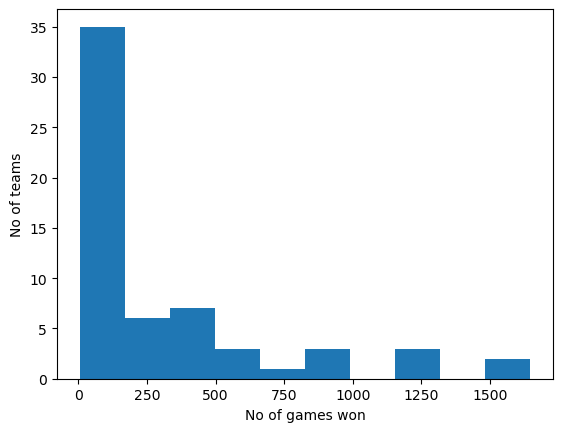

In [190]:
plt.hist(df_copy['WonGames'])
plt.xlabel('No of games won')
plt.ylabel('No of teams')
plt.show()

From the above graph, we infer that that data of number of wins is right skewed and teams have won 0-200 games.

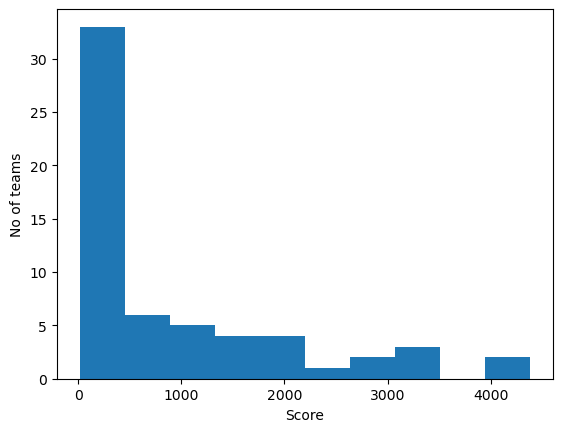

In [191]:
plt.hist(df_copy['Score']);
plt.xlabel('Score')
plt.ylabel('No of teams')
plt.show()

From the above graph we infer that, 
1. Score data is right skewed
2. Most of the teams got the score betwen 0 to 500
3. Very few teams have scored more than 4000 approx 3 teams termed as Outliers.

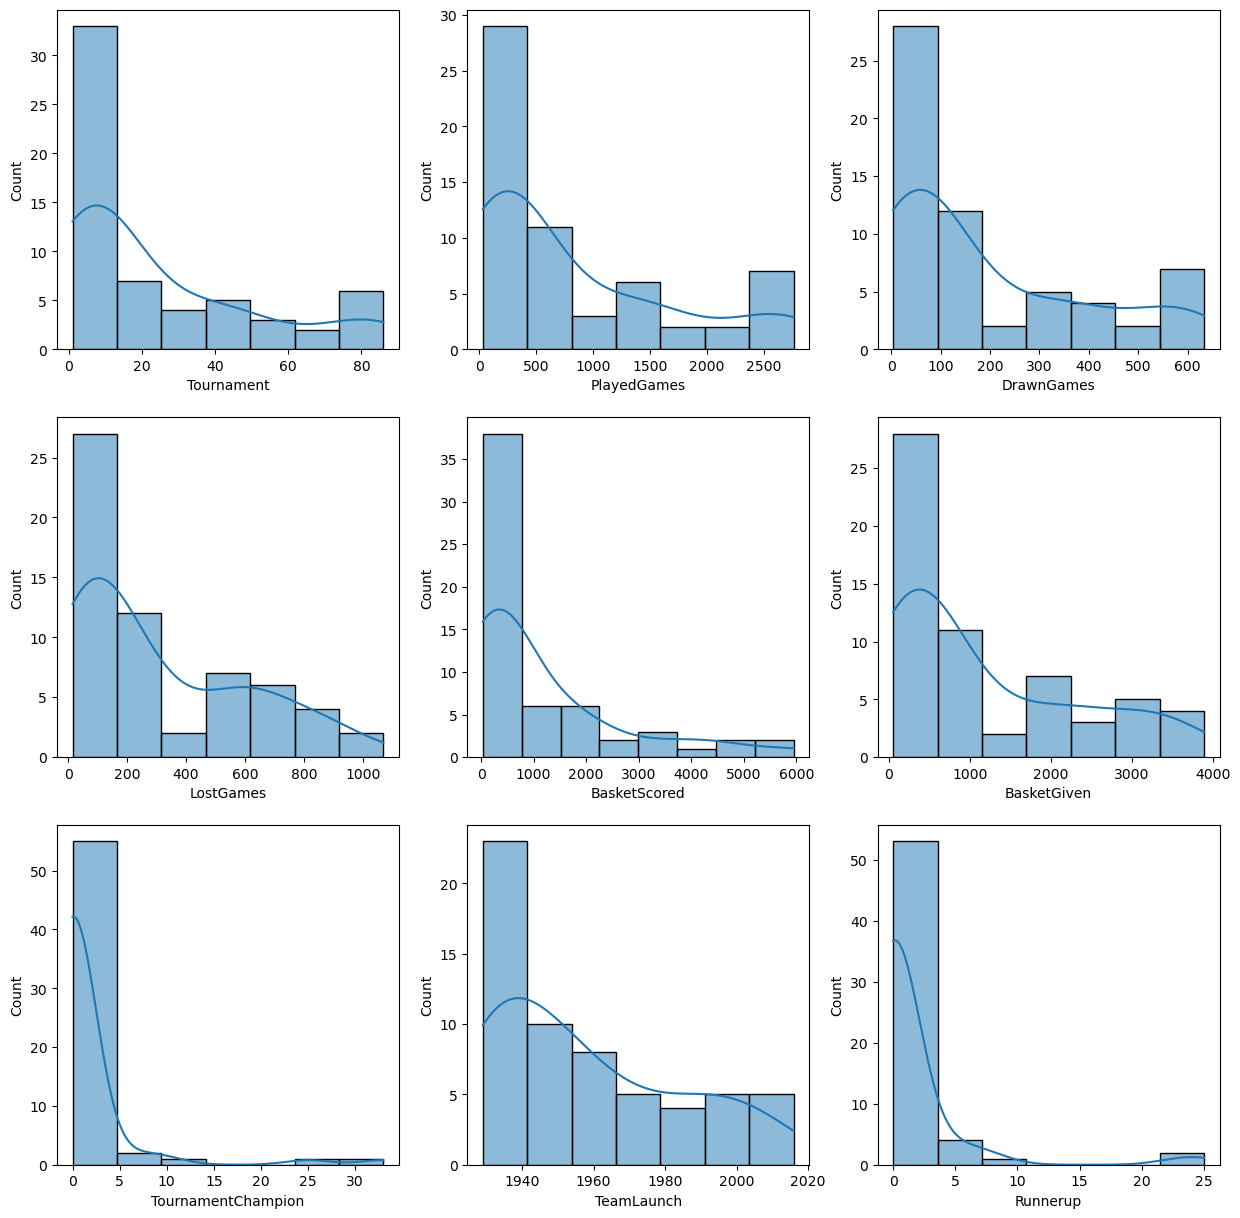

In [565]:
new_cols = ['Tournament', 'PlayedGames', 'DrawnGames',
       'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion', 'TeamLaunch',
       'Runnerup']
plt.figure(figsize=(15,15)) 
index = 1
for i in df_copy[new_cols]:
    plt.subplot(3,3,index)
    sns.histplot(df_copy[i], kde=True)
    index += 1

From the above plots, we infer that the data is right skewed. 

# Bivariate Analysis

# Plotting the top 10 teams based on the number of games won

In [223]:
top10 = df_copy[:10].sort_values(by = 'WonGames',ascending = False)

In [224]:
top10

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1
6,Team 7,82,2792,2626,948,608,1070,3609,3889,0,0,1929,3
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1
8,Team 9,58,2109,1986,698,522,766,2683,2847,0,1,1939,2
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,0,1932,1


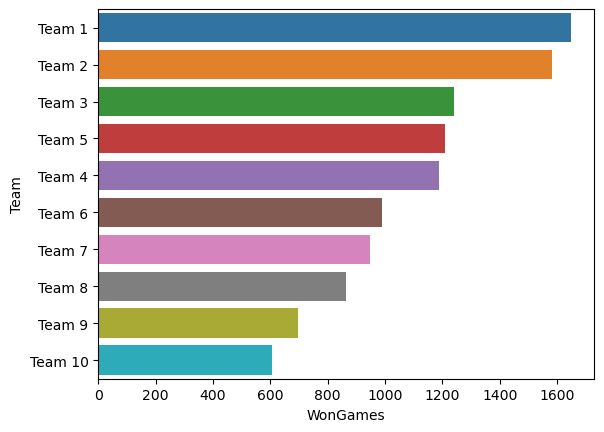

In [227]:
sns.barplot(y=top10['Team'], x= top10['WonGames'])
plt.show()

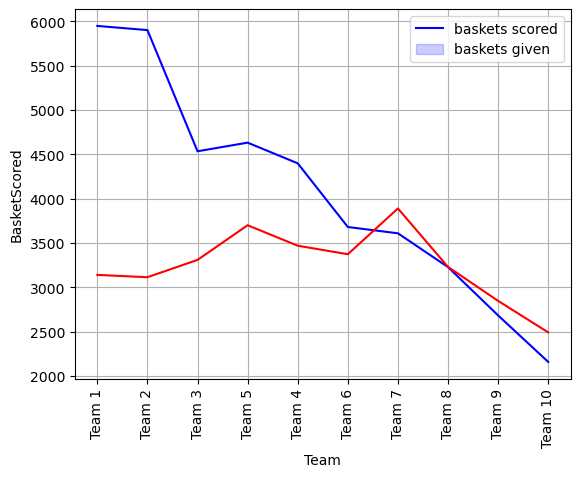

In [264]:
sns.lineplot(x = 'Team', y = 'BasketScored', data=top10, color='blue')
sns.lineplot(x = 'Team', y = 'BasketGiven', data=top10, color='red')
plt.grid()
plt.xticks(rotation=90)
plt.legend(labels=['baskets scored', 'baskets given'])
plt.show()

From the above two graphs, we infer that team 1 has scored highest baskets outperforming the baskets given with highest number of matches won. 

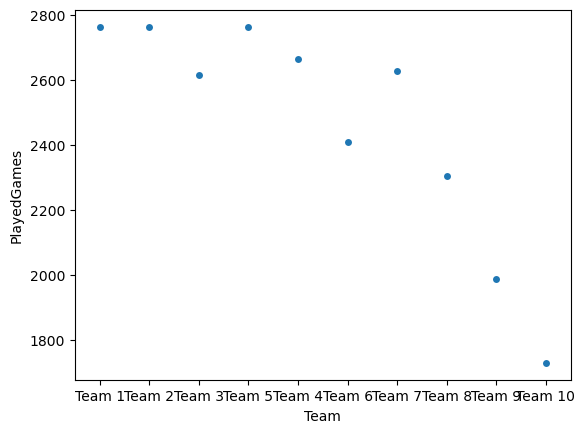

In [575]:
sns.stripplot(data = top10, x = 'Team', y = 'PlayedGames');

Above graphs shows that team 1, 2 and 5 have played equal number of games.

In [249]:
df_copy['TeamLaunchCategory'] = (pd.qcut(df_copy['TeamLaunch'], 4, labels=['Very Old', 'Old', 'New', 'Very New']));

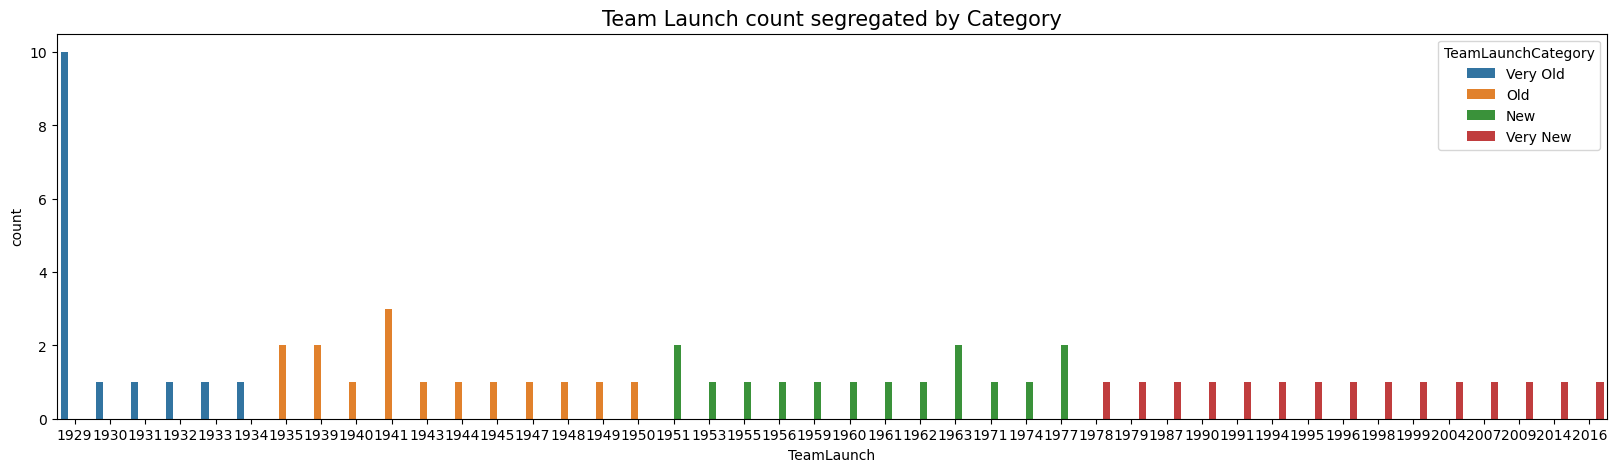

In [613]:
plt.figure(figsize=(20,5))
sns.countplot(x='TeamLaunch',hue='TeamLaunchCategory',data = df_copy)
plt.title("Team Launch count segregated by Category",size=15)
plt.show()

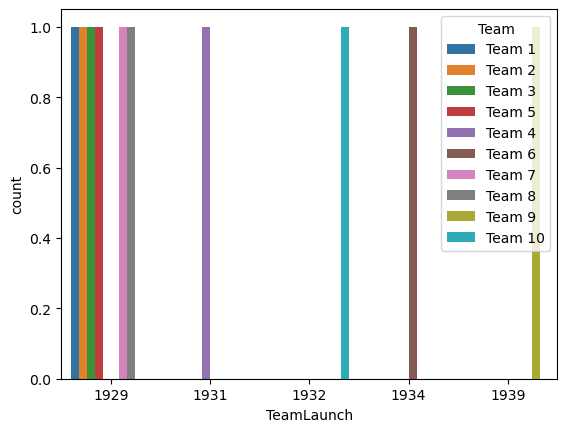

In [614]:
sns.countplot(x = 'TeamLaunch', hue = 'Team', data=top10);

From the above graphs, it is clear that most of the winning teams have been launched during the year 1929.

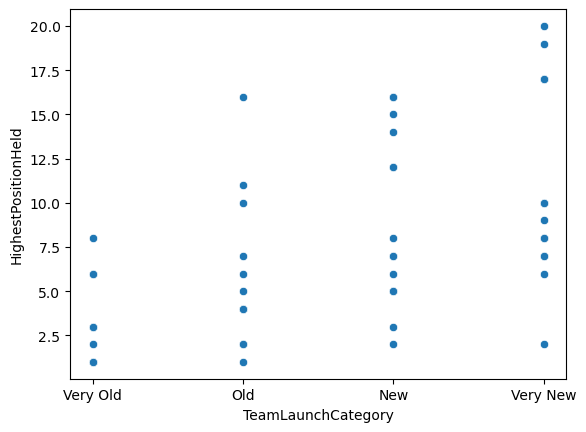

In [615]:
sns.scatterplot(data = df_copy, x = 'TeamLaunchCategory', y = 'HighestPositionHeld');

From the above graph, new teams have scored the highest position when compared to other teams. 

# Finding the winning and losing percentage

In [305]:
df_copy['Win %'] = round((df_copy.WonGames/ df_copy.PlayedGames)*100,2)
df_copy['Loss %'] = round((df_copy.LostGames/ df_copy.PlayedGames)*100,2)

In [307]:
df_copy.describe(include = 'all')

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld,TeamLaunchCategory,Win %,Loss %
count,60,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000,60,60.000000,60.000000
unique,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
top,Team 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very Old,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,NaN,NaN
mean,NaN,24.383333,916.450000,810.100000,309.033333,192.083333,308.816667,1159.350000,1159.233333,1.45000,1.433333,1957.950000,7.050000,NaN,31.364667,44.992167
std,NaN,26.884620,1138.342899,877.465393,408.481395,201.985508,294.508639,1512.063948,1163.946914,5.51554,4.574679,26.646732,5.315232,NaN,7.831421,8.401111
min,NaN,1.000000,14.000000,30.000000,5.000000,4.000000,15.000000,34.000000,55.000000,0.00000,0.000000,1929.000000,1.000000,NaN,16.670000,20.380000
25%,NaN,4.000000,104.250000,115.500000,34.750000,26.250000,62.750000,154.500000,236.000000,0.00000,0.000000,1934.750000,3.000000,NaN,27.610000,41.147500
50%,NaN,12.000000,395.500000,424.500000,124.000000,98.500000,197.500000,444.000000,632.500000,0.00000,0.000000,1950.500000,6.000000,NaN,30.490000,45.725000
75%,NaN,39.000000,1360.500000,1345.500000,432.750000,331.500000,563.500000,1669.750000,2001.250000,0.00000,0.000000,1977.250000,10.000000,NaN,33.542500,48.542500


/var/folders/_x/dnfm4pdj113142xdyz6vr6r80000gn/T/ipykernel_29862/861352906.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy['Win %'], ax = ax[0]);
/var/folders/_x/dnfm4pdj113142xdyz6vr6r80000gn/T/ipykernel_29862/861352906.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_copy['Lo

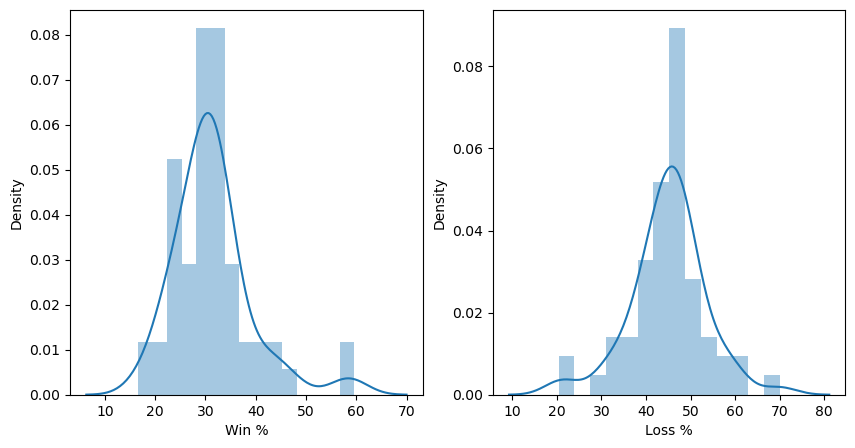

In [ ]:
fig, ax = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(10)
sns.distplot(df_copy['Win %'], ax = ax[0]);
sns.distplot(df_copy['Loss %'], ax = ax[1]);
plt.show()

From the above graph, we infer that winning percentage data is slightly right skewed and mean is around 31%.
Also, the loss percentage is around 45%. 

In [320]:
top10['Win'] = df_copy['Win %']
top10['Loss'] = df_copy['Loss %']

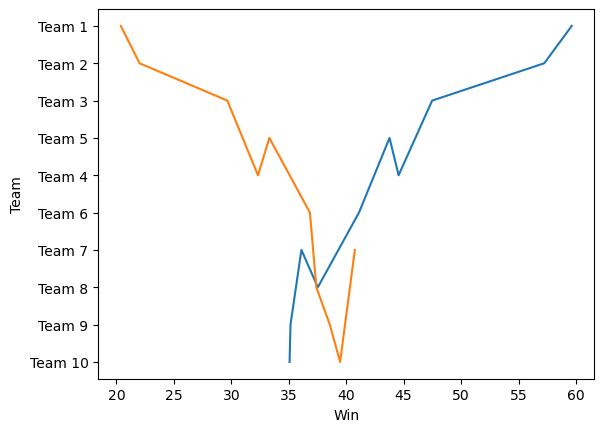

In [328]:
sns.lineplot(data = top10, x = 'Win', y = 'Team');
sns.lineplot(data = top10, x = 'Loss', y = 'Team');

From the above graph, it is evident that T1 is the best performing team as the winning percentage is highest(~60%) and loss percentage is 20%.

# Mutivariate Analysis

/var/folders/_x/dnfm4pdj113142xdyz6vr6r80000gn/T/ipykernel_29862/74216143.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_copy.corr(),annot=True);


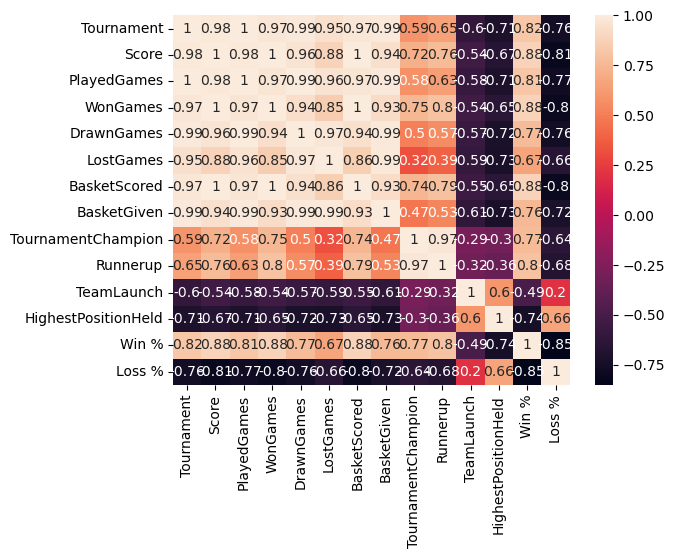

In [566]:
sns.heatmap(df_copy.corr(),annot=True);
plt.show()

From the above heatmap, we infer the following points - 
1. There is a positive correlation between score, wongames and BasketScored.
2. Variables execpt teamlaunch and highestpositionheld are positively correlated. 
3. Correlation between PlayedGames and Drawn Games is 0.99 which indicates most of the games are Drawn compared to win/lost games.

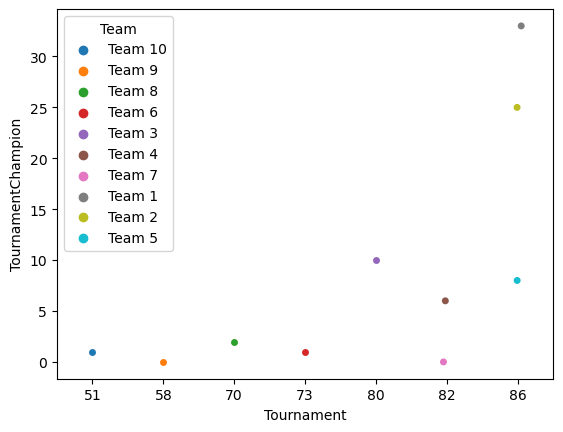

In [606]:
sns.stripplot(data = top10, x = 'Tournament', y = 'TournamentChampion', hue = 'Team' );

1. From the above graph, we infer that T1, T2 and T5 have participated in equal number of tournaments and T1 has won the tournament champion maximum number of the times.
2. Also, T4 and T5 have also won few tournaments.

Finding Lowest Performing Team

In [344]:
df_copy[(df_copy['Win %'] == df_copy['Win %'].min()) & (df_copy['Loss %'] ==df_copy['Loss %'].max())]

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runnerup,TeamLaunch,HighestPositionHeld,TeamLaunchCategory,Win %,Loss %
59,Team 60,1,14,30,5,4,21,34,65,0,0,1955,15,New,16.67,70.0


We infer that T60 is the least performing team among the dataset.

/var/folders/_x/dnfm4pdj113142xdyz6vr6r80000gn/T/ipykernel_29862/2233863545.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  p = df_copy.groupby('TeamLaunchCategory').sum()[["Win %", "Loss %"]].plot.bar(rot = 20)


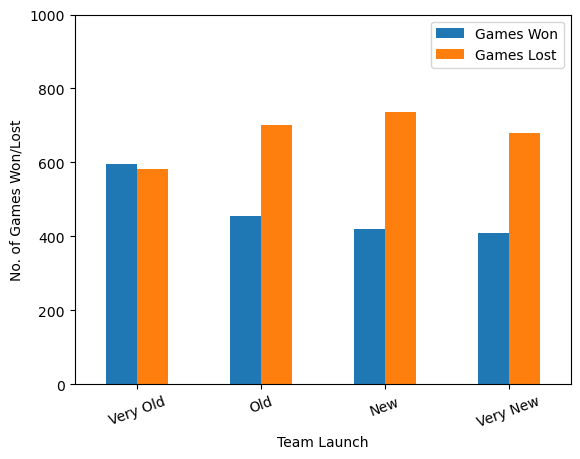

In [616]:
p = df_copy.groupby('TeamLaunchCategory').sum()[["Win %", "Loss %"]].plot.bar(rot = 20)
p.set(xlabel = "Team Launch", ylabel = "No. of Games Won/Lost", ylim = (0, 1000)), p.legend(["Games Won", "Games Lost"]);
plt.show()

From the above graph, it is evident that losing percentage is lower for the "Very old" teams compared to other categories.
We can also infer that the new teams must be given more training to increase their performance in future.

# Observations and Suggestions

1. Quantity: As the dataset has only 61 entries with information about the teams, it was difficult to find more trends and patterns in the data. It is recommended to have more information about the players to derive more insights. 
2. Data is highly correlated.
3. Quality: There were missing values which had to be imputed before any further analysis. Eg - Row 61 had most of the data missing due to which we had to drop the entire row. 
4. Few columns even had outliers present in the dataset. 
5. Velocity: A repository of all the games must be maintained in order to achieve efficient data collection.
5. Variety: Adding more identifiers will help us to analyze teams accurately. Having more information about the players will help us to derive more insights.

# Conclusion

Company X can approach the top 5 teams namely Team 1,2,3,4,5 since they have the highest score, won tournament championship,  max no of baskets scored, max winning %. 

# Part C 

Question - Company X is a EU online publisher focusing on the startups industry. The company specifically reports on the business related to
technology news, analysis of emerging trends and profiling of new tech businesses and products. Their event i.e. Startup Battlefield is the world’s
pre-eminent startup competition. Startup Battlefield features 15-30 top early stage startups pitching top judges in front of a vast live audience,
present in person and online.

# Importing necessary Libraries

In [382]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the Dataset

In [404]:
eu_df = pd.read_csv('DS+-+Part3+-+CompanyX_EU.csv')
eu_df.head()

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating


# Data Exploration

A) Check the datatypes of each attribute.

In [405]:
eu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


All the columns are of object type. 

B) Check for null values in the attributes.

In [406]:
eu_df.isnull().sum()

Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64

There are 214 NaN values in Funding column.

# Data preprocessing & visualisation

A) Drop the null values

In [407]:
eu_new = eu_df.dropna().copy(deep=True)

B) Convert the ‘Funding’ features to a numerical value

In [408]:
eu_new.loc[:,'Funds_in_million'] = eu_new['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))

In [409]:
eu_new

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.00
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80
...,...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating,8.00
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating,1.00
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating,223.00
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating,3.40


C) Plot box plot for funds in million

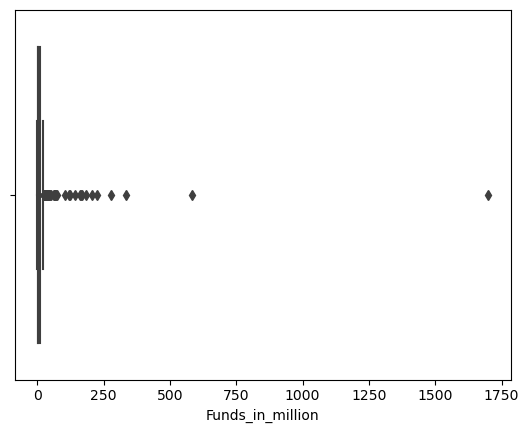

In [410]:
sns.boxplot(data = eu_new, x = 'Funds_in_million');

D) Check the number of outliers greater than the upper fence.

In [411]:
upper_limit = eu_new['Funds_in_million'].mean() + 3*eu_new['Funds_in_million'].std()
print('Upper Fence :', upper_limit)
lower_limit = eu_new['Funds_in_million'].mean() - 3*eu_new['Funds_in_million'].std()
print('Lower Fence :' , lower_limit)

Upper Fence : 288.69261876000576
Lower Fence : -254.20964162996088


Data points lying below -254.20 and greater than 288.69 are considered as outliers.

In [417]:
def detect_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[(df>(q3+1.5*IQR))]
   return outliers

outliers = detect_outliers_IQR(eu_new['Funds_in_million'])
print('number of outliers: '+ str(len(outliers)))

number of outliers: 60


E) Check frequency of the OperatingState features classes.

In [418]:
eu_new.OperatingState.value_counts()

Operating    319
Acquired      66
Closed        57
Ipo            4
Name: OperatingState, dtype: int64

# Statistical Analysis

A) Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down?

/var/folders/_x/dnfm4pdj113142xdyz6vr6r80000gn/T/ipykernel_29862/1198534060.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(eu_new.loc[eu_new.OperatingState == 'Operating', 'Funds_in_million'], ax = ax[0]);
/var/folders/_x/dnfm4pdj113142xdyz6vr6r80000gn/T/ipykernel_29862/1198534060.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de4414

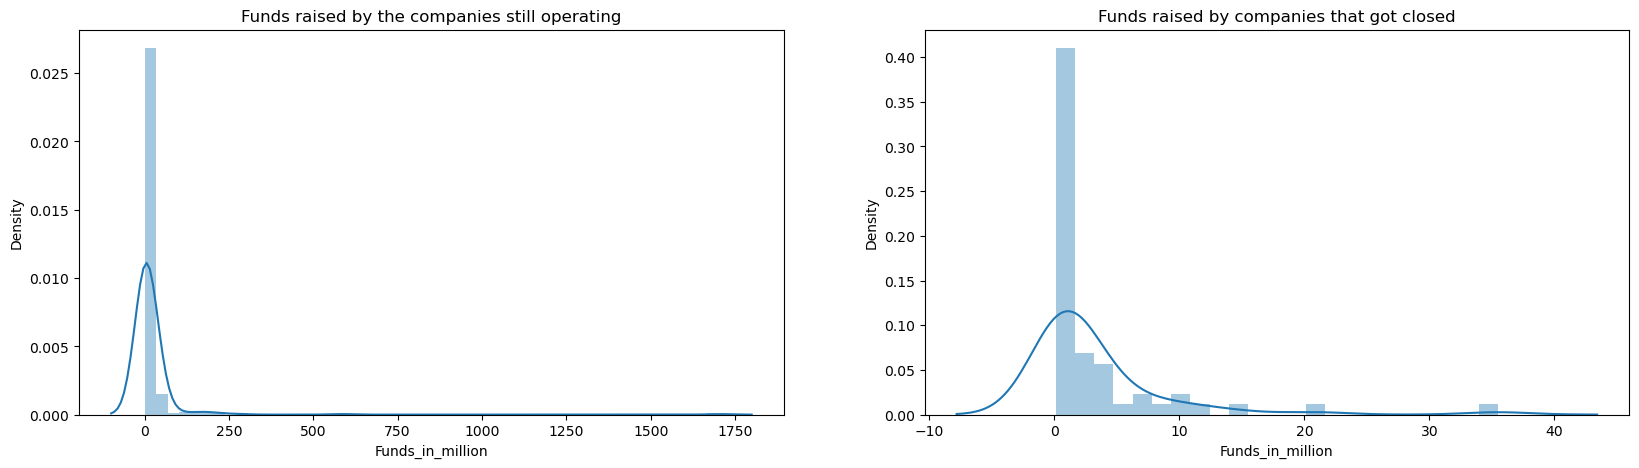

In [434]:
fig, ax = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(20)
sns.distplot(eu_new.loc[eu_new.OperatingState == 'Operating', 'Funds_in_million'], ax = ax[0]);
sns.distplot(eu_new.loc[eu_new.OperatingState == 'Closed', 'Funds_in_million'], ax = ax[1]);
ax[0].set_title('Funds raised by the companies still operating')
ax[1].set_title('Funds raised by companies that got closed')
plt.show()

B) Write the null hypothesis and alternative hypothesis.

Null Hypothesis (Ho) - There is no significant difference between the means of two samples.
Alternative Hypothesis (Ha) - There is significant difference between the means of two samples.

C) Test for significance and conclusion

Here, we consider the level of significance as 0.05. 

In [435]:
from statsmodels.stats.weightstats import ztest

In [439]:
s1 = eu_new.loc[eu_new.OperatingState == 'Operating', 'Funds_in_million']
s2 = eu_new.loc[eu_new.OperatingState =='Closed', 'Funds_in_million']
alpha = 0.05

In [437]:
ztest_Score, p_value= ztest(s1, s2)

In [441]:
p_value

0.25499838490589677

In [440]:
if(p_value <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis")

Fail to Reject NUll Hypothesis


As p -value = 0.254 which is greater than level of significance (0.05), we fail to reject the null hypothesis. 
Thus there is no significant difference between the Funds raised by companies irrespective of the operating State.

D) Make a copy of the original data frame. 

In [524]:
eu_copy = eu_new.copy(deep = True)
eu_copy.head()

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.00
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80


E) Check frequency distribution of Result variables

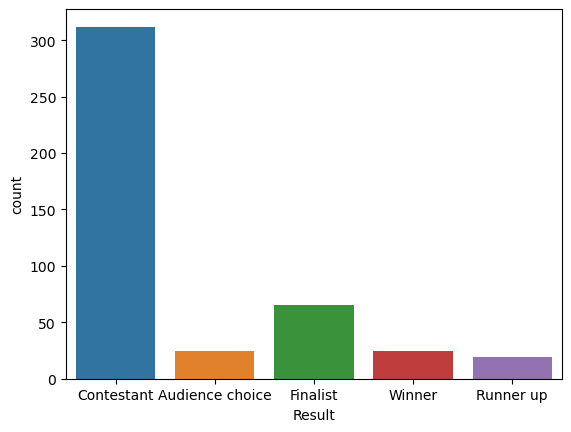

In [620]:
sns.countplot(data = eu_copy, x = 'Result');
plt.show()

F) Calculate percentage of winners that are still operating and percentage of contestants that are still operating

In [526]:
contestants = eu_copy.Result.value_counts()['Contestant']
winners = eu_copy.Result.value_counts()['Winner']

In [527]:
contestants_operating = eu_copy.OperatingState[eu_copy.Result == 'Contestant'].value_counts().loc['Operating']
winners_operating = eu_copy.OperatingState[eu_copy.Result == 'Winner'].value_counts().loc['Operating']
win_percent = winners_operating/winners 
contest_percent = contestants_operating/contestants
win_percent , contest_percent

(0.72, 0.6858974358974359)

G) Write your hypothesis comparing the proportion of companies that are operating between winners and contestants:

Null hyputhesis (Ho): There is no significant difference between Proportion of companies that are operating in both categories.
Alternative hypothesis (Ha): There is significant different in the Proportion of companies that are operating. 

H) Test for significance and conclusion

In [ ]:
alpha = 0.05

In [528]:
from statsmodels.stats.proportion import proportions_ztest
ztest_Score, p_value = proportions_ztest([contestants_operating, winners_operating], [contestants, winners])
if(p_value <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis")

Fail to Reject NUll Hypothesis


In [529]:
p_value

0.7231510556194248

As p -value = 0.723 which is greater than level of significance (0.05), we fail to reject the null hypothesis. Thus there is no significant difference between the Proportion of companies that are operating in both categories. 

I) Select only the Event that has ‘disrupt’ keyword from 2013 onwards

In [530]:
def new_func(df1):
   if 'Disrupt' in df1 and int(df1[-4:]) >= 2013:
       return df1

find_disrupt = eu_copy['Event'].apply(new_func)

In [534]:
find_disrupt.value_counts()

Disrupt NYC 2013       22
Disrupt SF 2013        22
Disrupt NY 2015        21
Disrupt SF 2015        19
Disrupt SF 2014        19
Disrupt SF 2016        17
Disrupt NY 2016        16
Disrupt NYC 2014       16
Disrupt London 2015    12
Disrupt London 2016    10
Disrupt EU 2014        10
Disrupt EU 2013         9
Name: Event, dtype: int64